# Visibility Merge

Divide-and-conquer algorithm for finding visibility regions.

In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mplp
import matplotlib.collections as mplc
from collections import namedtuple

from stuff import *

%matplotlib inline

We use a numpy array of two numbers to represent a point and a 2d numpy array to represent a line segment.

To represent a visibility region we use a list of 3-tuples, each 3-tuple has a unit vector representing a direction and two scalars.

In [2]:
VisVector = namedtuple('VisVector', 'v r l')

origin = np.array([0, 0])

segments = [np.array([[7, 9], [-5, 2]]),
            np.array([[-7, -7], [0, -7]]),
            np.array([[5, -5], [10, 0]])]

vregion = []
for s in segments:
    vregion.append(VisVector(normalize(s[0]), -1, norm(s[0])))
    vregion.append(VisVector(normalize(s[1]), norm(s[1]), -1))

To draw the segments and visiblity region we use the following function.

In [5]:
def draw(segments=[], region=[], xlim=12, ylim=12):

    rlim = math.ceil(max(xlim, ylim) * math.sqrt(2.0))

    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw line segments

    lc = mplc.LineCollection(segments, linewidths=2)
    ax.add_collection(lc)

    # Draw triangles and wedges

    patches = []
    unbounded_regions = []
    
    iv = np.array([1, 0])
    
    for i, vec in enumerate(region):

        pvec = region[i - 1] if i > 0 else VisVector(iv, -1, -1)

        if vec.r < 0 and not np.array_equal(vec.v, pvec.v):
            unbounded_regions.append((atan2(pvec.v), atan2(vec.v)))

        if vec.r > 0 and pvec.l > 0:
            patches.append(mplp.Polygon(np.array([origin, pvec.v * pvec.l, vec.v * vec.r]), True))

    if len(region) > 0 and not np.array_equal(region[-1].v, iv):
        unbounded_regions.append((atan2(region[-1].v), 0))

    for (t1, t2) in unbounded_regions:
        patches.append(mplp.Wedge(origin, rlim, t1 * 180 / math.pi, t2 * 180 / math.pi))

    pc = mplc.PatchCollection(patches, alpha=0.4)
    ax.add_collection(pc)

    # Draw origin

    ax.plot([origin], marker='o')

    # mpl stuff

    ax.margins(0.1)
    ax.set_aspect('equal', 'box')

    ax.set_xlim(-xlim, xlim)
    ax.set_ylim(-ylim, ylim)

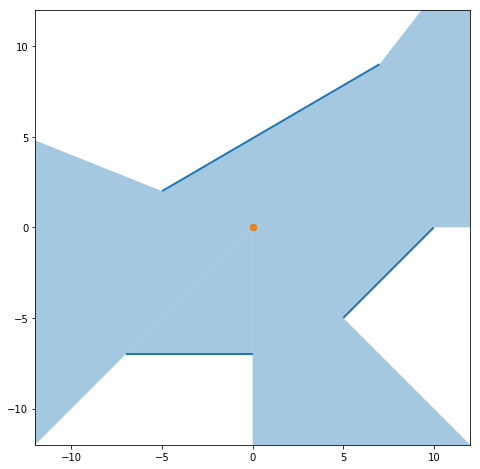

In [6]:
draw(segments, vregion)